In [2]:
from scNAT.main import DeepTCR_U
import scanpy as sc
from IPython.utils import io

In [3]:
# Data loading
DTCRU = DeepTCR_U('tutorial', max_length=50)

# The TCR data need to contain cell barcode and CDR3, V gene, and J gene information for both chains, each in a 
# separate column
# The RNA data should have the same cell barcode and order as the TCR data, and each column represents a gene
# For example, alpha chain CDR3 is in column 29, V gene in column 23, J gene in column 25, beta chain CDR3 in 
# column 12, V gene in column 6, J gene in column 8
DTCRU.Get_Data(directory='../data/concat_MS_ResPAN_sub4000/', 
               file_rna = '../data/concat_MS_ResPAN_notcr_sub4000.csv', aggregate_by_aa=False, 
               aa_column_alpha = 29, v_alpha_column=23, j_alpha_column=25, aa_column_beta=12, 
               v_beta_column=6, j_beta_column=8, sep = ',') 

Loading Data...
Embedding Sequences...
Read in scRNA-seq data...
Data Loaded


In [6]:
# Run scNAT
with io.capture_output() as captured:
    DTCRU.Train_VAE(batch_size = 32, epochs_min=5, latent_alpha = 1e-06, gene_alpha = 1e-03, seq_alpha = 1e-02)

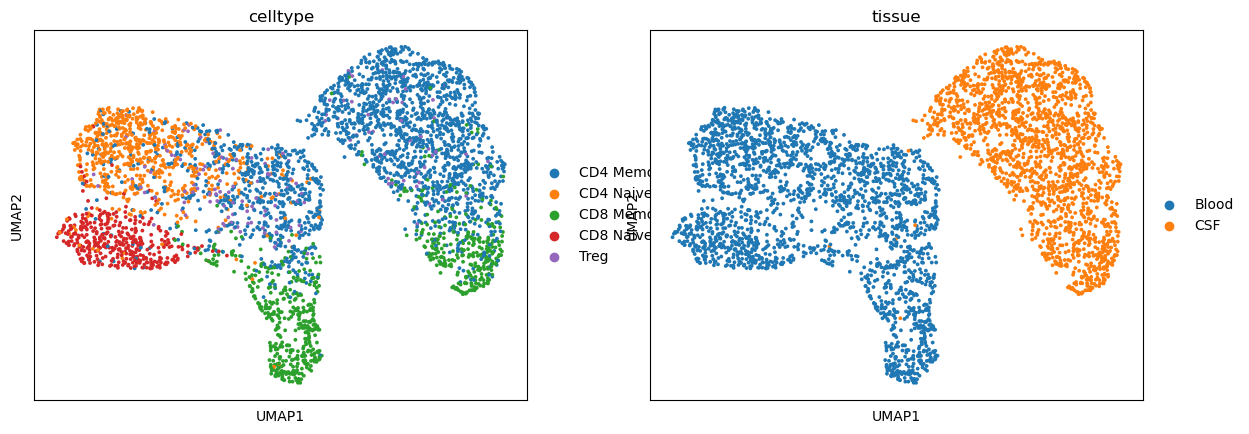

In [11]:
# Load the corresponding adata object
# Note: we only subsampled ~8% of the data for demonstration purpose, so some of the original patterns might be 
# lost
adata = sc.read_h5ad('../data/concat_MS_ResPAN_sub4000.h5ad')
adata = adata[DTCRU.barcode,:]
adata.obsm['z_vae'] = DTCRU.features
adata.obsm['X_pca'] = adata.obsm['z_vae'].copy()
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)
adata.obsm['integ_umap'] = adata.obsm['X_umap'].copy()

# Visualize the integrated UMAP colored by cell type or tissue
sc.pl.umap(adata, color = ['celltype', 'tissue'])